In [262]:
import datetime
import numpy as np
from matplotlib import cm, pyplot as plt
import pandas as pd
from pandas_datareader import data
import seaborn as sns
from sklearn import tree
from pyextremes import EVA

In [263]:
df = data.DataReader("TCS.NS", start='1996-1-1', end='2021-1-1', data_source='yahoo')
df.to_csv("new.csv")
df=pd.read_csv("new.csv",
    index_col=0,
    parse_dates=True,
    squeeze=True,
)

# df.drop(df.columns[[0, 4, 2]], axis = 1, inplace = True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-08-12,40.000000,38.724998,38.724998,39.700001,212976.0,29.728262
2002-08-13,40.387501,38.875000,39.750000,39.162498,153576.0,29.325760
2002-08-14,39.250000,35.724998,39.250000,36.462502,822776.0,27.303944
2002-08-15,36.462502,36.462502,36.462502,36.462502,0.0,27.303944
2002-08-16,38.000000,35.750000,36.275002,36.375000,811856.0,27.238428


In [264]:
df.drop(columns = ['High', 'Low', 'Open', 'Adj Close','Volume'],inplace = True)

In [265]:
df = (
    df
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
)

In [266]:
series1=df.iloc[:,0]
type(series1)

pandas.core.series.Series

In [267]:
series1.head()

Date
2002-08-12    39.700001
2002-08-13    39.162498
2002-08-14    36.462502
2002-08-15    36.462502
2002-08-16    36.375000
Name: Close, dtype: float64

In [268]:
model = EVA(series1)

In [269]:
model.get_extremes(method="BM", block_size="365.2425D")

In [270]:
print(model.extremes.head())

Date
2003-01-01     61.087502
2004-05-06    115.887497
2005-07-28    321.125000
2006-05-04    255.462494
2007-01-15    331.587494
Name: Close, dtype: float64


(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Date', ylabel='Close'>)

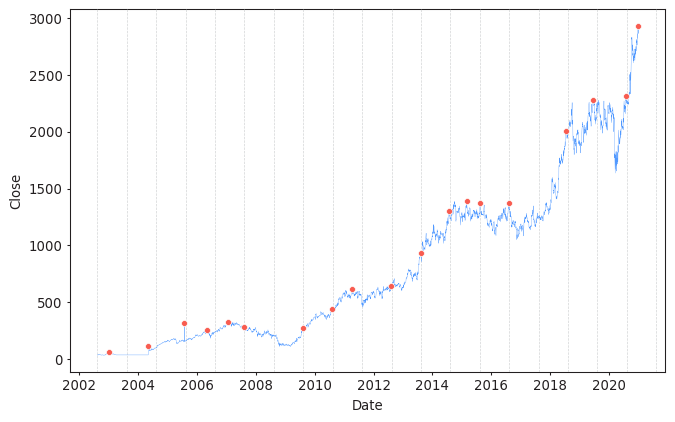

In [271]:
model.plot_extremes()

In [272]:
model.fit_model()

In [273]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)

In [274]:
print(summary)

               return value     lower ci     upper ci
return period                                        
1.0                    -inf         -inf         -inf
2.0              854.031983   519.289777  1252.597521
5.0             1546.826578   952.532800  2142.482815
10.0            2005.516882  1238.561200  2727.496570
15.0            2264.306076  1402.205325  3057.761473
20.0            2445.503635  1516.270457  3288.830271
25.0            2585.073298  1603.266758  3466.813873
30.0            2698.617158  1667.227471  3620.294332
35.0            2794.333982  1721.145986  3741.511069
40.0            2877.070015  1767.752254  3846.097271
50.0            3015.021354  1845.462014  4020.199846
100.0           3441.794742  2085.868938  4559.180510
250.0           4003.711670  2430.552973  5269.276307
500.0           4428.002890  2691.660820  5805.454159
1000.0          4851.987340  2949.705541  6358.212794


(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='Close'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='Close', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

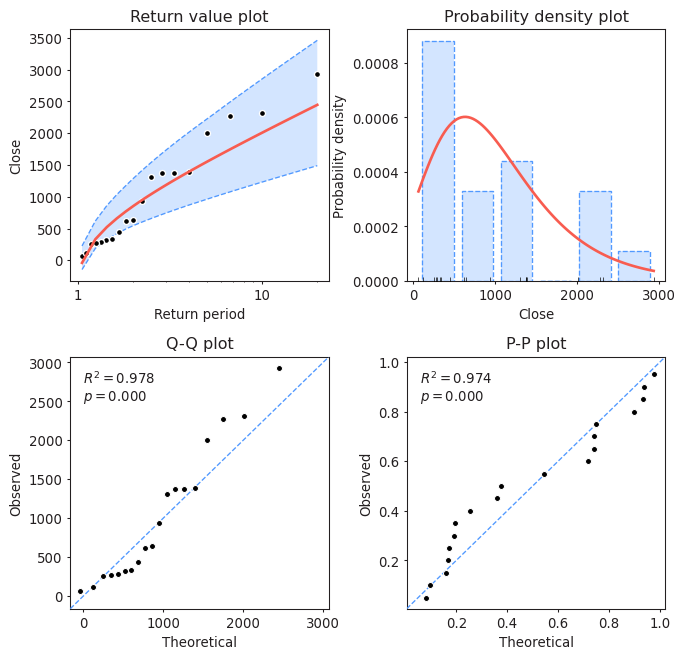

In [275]:
model.plot_diagnostic(alpha=0.95)

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Return period', ylabel='Close'>)

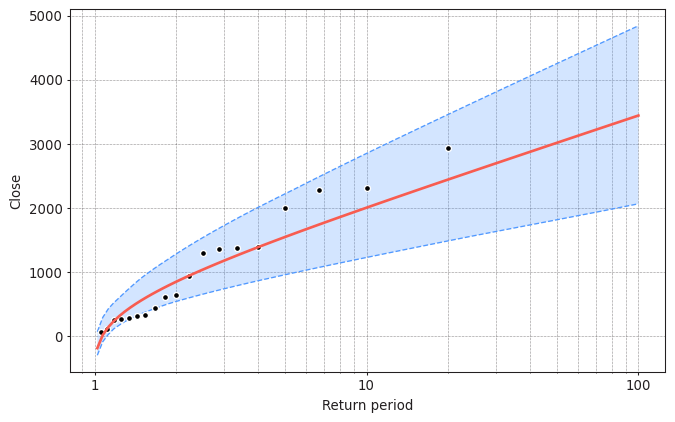

In [276]:
model.plot_return_values(
    return_period=np.logspace(0.01, 2, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)

In [277]:
model.fit_model('Emcee')

In [278]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
)

In [279]:
print(summary)

               return value     lower ci     upper ci
return period                                        
1.0                    -inf         -inf         -inf
2.0              854.897254   545.515031  1298.031031
5.0             1548.156445  1164.141973  2403.834245
10.0            2007.154352  1530.459575  3175.386830
25.0            2587.099424  1979.719985  4163.089085
50.0            3017.335809  2314.506279  4887.122534
100.0           3444.395395  2643.288038  5625.650857
250.0           4006.689152  3074.187833  6582.205363
500.0           4431.264905  3398.974506  7292.670648
1000.0          4855.533684  3722.428484  8007.576824


(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='Close'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='Close', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

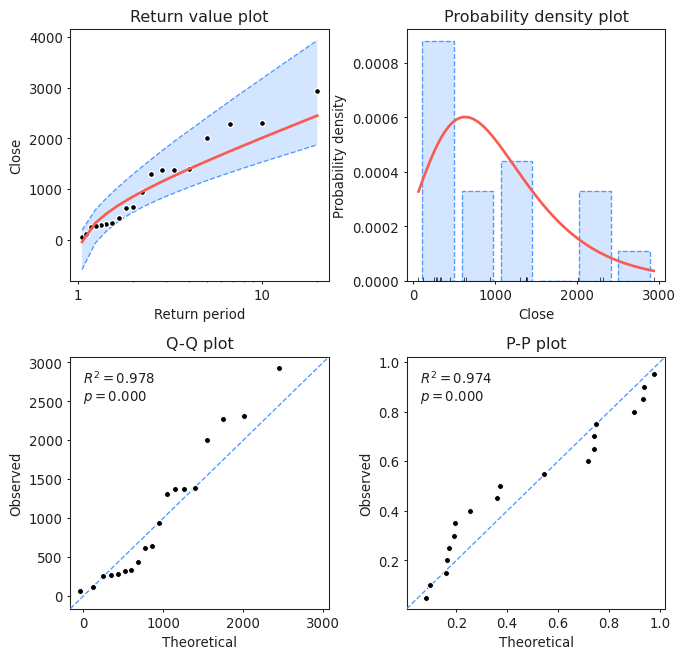

In [280]:
model.plot_diagnostic(alpha=0.95)

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Threshold', ylabel='Mean excess'>)

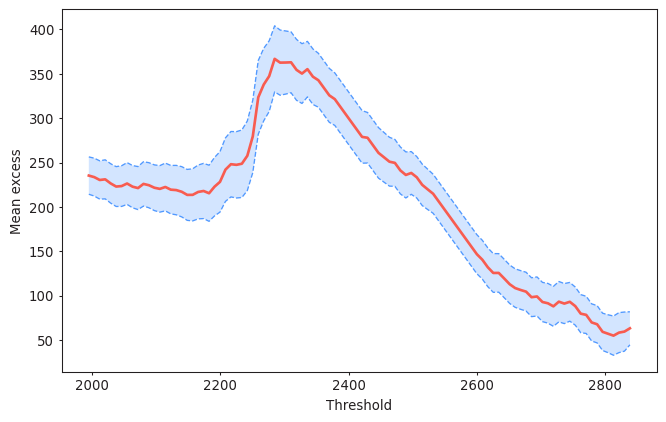

In [281]:
import pyextremes
pyextremes.plot_mean_residual_life(ts=series1)

(<Figure size 768x480 with 2 Axes>,
 (<AxesSubplot:ylabel='Shape, $\\xi$'>,
  <AxesSubplot:xlabel='Threshold', ylabel='Modified scale, $\\sigma^*$'>))

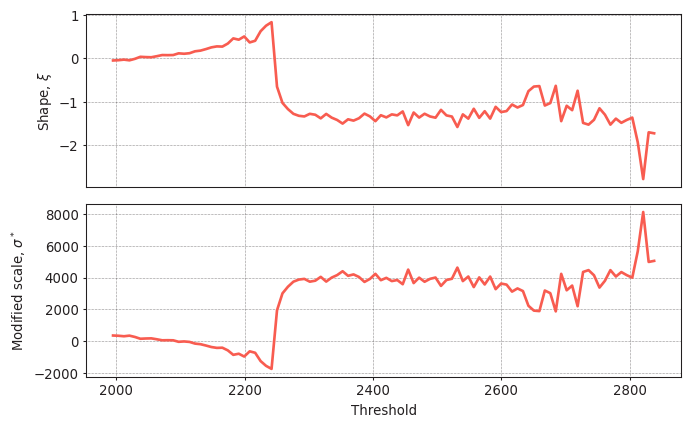

In [282]:
pyextremes.plot_parameter_stability(ts=series1)

In [ ]:
pyextremes.plot_return_value_stability(
    ts=series1,
    return_period=100,
    return_period_size="365.2425D",
    extremes_type="high",
    distributions=["genpareto", "expon"],
    alpha=0.95,  # Set to None to get faster results
    n_samples=100,
)

In [ ]:
model = EVA(series1)

In [ ]:
model.get_extremes(
    method="POT",
    extremes_type="high",
    threshold=675,
)

In [ ]:
model.plot_extremes()

In [ ]:
model.fit_model()


In [ ]:
model.plot_diagnostic(alpha=0.95)

In [ ]:
model.plot_return_values(
    return_period=np.logspace(0.01, 2, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)

In [ ]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
summary